# Universal Function Approximator
-----------------------


A two-layer network is defined by three steps:

1. Compute the first layer, i.e., $\vec a = \mathbf W^{(1)} \vec x$.
2. Apply the activation function element-wise: $\vec h = g(\vec a)$
3. Compute the network output: $y = \vec w^{(2)}\,^T\vec h$.

## Network Implementation

Implement a function that returns the network output for a given input $\vec x$ and parameters $\Theta=(\mathbf W^{(1)}, \vec w^{(2)})$. The input of the function is $\vec x = (1, x)^T$.

In [1]:
import numpy as np

def network(x, Theta):
  W1, w2 = Theta
  a = W1.dot(x) 
  h = 1/(1+np.exp(-a)) 
  h = np.insert(h, 0, 1, axis=0) 
  y = w2.dot(h) 
  return y, h
 

## Zero and One Weights

A specific number of hidden neurons is selected and the weights are created accordingly, using all zeros in the first layer and all ones in the second.

In [3]:
K = 10
W1_zeros = np.zeros((K,2)) 
w2_ones = np.ones((K+1),dtype='float') 

# test network output 
Theta = (W1_zeros, w2_ones) 
h_expected = np.append(1,0.5*(np.ones((K,1)))) 
y_expected = np.array([6])
y_calc, h_calc = network(np.array([1,2]),Theta) 
assert np.all(np.abs(h_calc - h_expected) < 1e-8) 
assert np.all(np.abs(y_calc - y_expected) < 1e-8) 
print("Results as expected")


Results as expected


## Gradient Implementation

The gradient needs to be computed for a given dataset $X=\{(\vec x^{[n]}, t^{[n]})\}$, which is composed of two parts, one for $\mathbf W^{(1)}$ and one for $\vec w^{(2)}$.

In [5]:
def gradient(X, Theta):
  # split parameters for easier handling 
  W1, w2 = Theta 
  # define gradient with respect to both parameters 
  dW1 = np.zeros(W1.shape) 
  dw2 = np.zeros(w2.shape) 
  
  # iterate over dataset 
  for x, t in X: 
    y, h = network(x, Theta) 
    diff = (y-t) 
    # the values corresponding to the bias are not considered
    delta1 = np.multiply(w2[1:],h[1:]) 
    delta2 = np.multiply(delta1,1-h[1:]) 

    # compute the gradient 
    dW1 += np.outer(diff*delta2, x) 
    dw2 += diff*h 
    
  dW1 *= 2/X.shape[0] 
  dw2 *= 2/X.shape[0] 
  return dW1, dw2
  


## Gradient Descent

Gradient descent is implemented as the repeated application of two steps:

1. Compute the gradient of loss via the gradient function implemented above.
2. Update the parameters according to a given learning rate $\eta$.

Implement a function that performs gradient descent for a given dataset, given initial parameters and a given learning rate $\eta$.

In [6]:
def gradient_descent(X, Theta, eta):
  epochs = 10000
  W1, w2 = Theta
  # perform iterative gradient descent
  for epoch in range(epochs):
    # compute the gradient 
    dTheta = gradient(X, Theta) 
    # update the parameters 
    W1 -= eta * dTheta[0] 
    w2 -= eta * dTheta[1] 
    
  # return optimized parameters 
  return W1, w2

## Datasets

Create datasets $X_1$, $X_2$ and $X_3$ according to vaious functions and ranges. Note that $\vec x = (1,x)^T$ and the structure of the dataset is a list of tuples: $\{(\vec x^{[n]}, t^{[n]})\}$.

In [7]:
X1 = np.array([(np.array((1, x)),np.cos(3*x)) for x in np.random.uniform(-2,2,50)]) 
X2 = np.array([(np.array((1, x)),np.exp(-(x**2))) for x in np.random.uniform(-2,2,30)]) 
X3 = np.array([(np.array((1, x)),x**5 + 3*x**4 - 11*x**3 - 27*x**2 + 10*x + 64) for x in np.random.uniform(-4.5,3.5,200)])


/var/folders/f7/3h12r1sx5js698pgvhc4sjqw0000gn/T/ipykernel_68980/573186310.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X1 = np.array([(np.array((1, x)),np.cos(3*x)) for x in np.random.uniform(-2,2,50)])
/var/folders/f7/3h12r1sx5js698pgvhc4sjqw0000gn/T/ipykernel_68980/573186310.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X2 = np.array([(np.array((1, x)),np.exp(-(x**2))) for x in np.random.uniform(-2,2,30)])
/var/folders/f7/3h12r1sx5js698pgvhc4sjqw0000gn/T/ipykernel_68980/573186310.py:3: VisibleDeprecationWarning: Creating an ndarray fr

## Define Number of Hidden Neurons

In [8]:
K1 = 6 
K2 = 25 
K3 = 100

## Random Parameters

Initialize three different sets of parameters for the given number of samples.

In [9]:
Theta1 = [np.random.uniform(-1, 1, size=(K1, 2)), np.random.uniform(-1, 1, size=(K1+1))]
Theta2 = [np.random.uniform(-1, 1, size=(K2, 2)), np.random.uniform(-1, 1, size=(K2+1))]
Theta3 = [np.random.uniform(-1, 1, size=(K3, 2)), np.random.uniform(-1, 1, size=(K3+1))]

## Gradient Descent

Call gradient descent for each dataset with their according parameters.

In [10]:
theta1=gradient_descent(X1,Theta1,0.1) 
theta2=gradient_descent(X2,Theta2,0.1) 
theta3=gradient_descent(X3,Theta3,0.01)

## Plotting Function

Implement a function that plots the output of the network as a line along with the training data.

In [14]:
from matplotlib import pyplot as plt

def plot(X, Theta, R):
  # first, plot data samples
  x0=[xi[0][1] for xi in X] 
  y0=[xi[1] for xi in X] 
  plt.plot(x0, y0, "rx", label="Data")

  # define equidistant points from R[0] to R[1] to evaluate the network
  x = np.linspace(R[0], R[1], num=100)
  # compute the network outputs for these values
  y = [] 
  for index, value in enumerate(x): 
    y_t, h_t = network([1,value], Theta) 
    y.append(y_t)
  # plot network approximation
  plt.plot(x,y,"k-", label="network")
  plt.legend()

## Plot Three Functions with their Data

Call the plot function with the three different datasets and their optimized parameters.

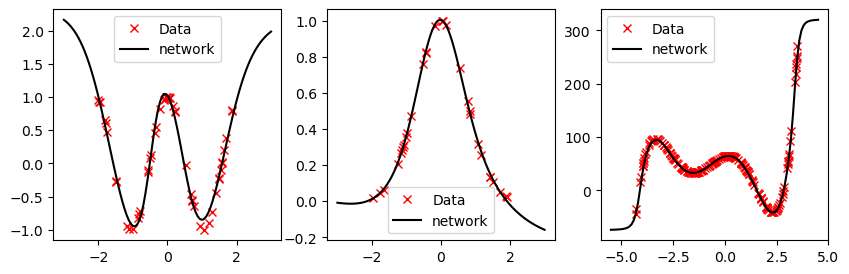

In [15]:

figure = plt.figure(figsize=(10,3))

# plot first function
plt.subplot(131)
plot(X1, Theta1, [-3, 3]) 

# plot second function
plt.subplot(132)
plot(X2, Theta2, [-3, 3]) 

# plot third function
plt.subplot(133)
plot(X3, Theta3, [-5.5, 4.5])